# <div style="text-align:center; color:rgba(37, 40, 80);">11752 Machine Learning</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Master in Intelligent Systems</div>
# <div style="text-align:center; color:rgba(37, 40, 80);">Universitat de les Illes Balears</div>

### <div style="text-align:center; color:white;"> Handout #3: **Unsupervised learning**</div>

#### **Integrants:** Jason Adel Noboa Rivera, Pedro Marti Pico
#### **Group:** 07

##### T0. Normalize the dataset samples using max-min normalization and consider the following cases:



In [78]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score
import matplotlib.pyplot as plt
from fuzzy_kmeans import KMeans, FuzzyKMeans


## Data preparation
### (a) Consider the original dataset and a lower-dimensional version obtained through PCA retaining 95% of the variance.

In [65]:
digits = load_digits ()
samples = digits.data
labels = digits.target
X = samples[(labels == 5) | (labels == 7) | (labels == 9)]
y = labels[(labels == 5) | (labels == 7) | (labels == 9)]

print("Filtered Data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Applying PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print("\nPCA Transformed Data:")
print("X_pca shape:", X_pca.shape)


Filtered Data:
X shape: (541, 64)
y shape: (541,)

PCA Transformed Data:
X_pca shape: (541, 27)


## Clustering
### (b) Cluster your dataset for m = 2, 3, 4 and 5 clusters and report on the performance attained in each case using the v-measure.

In [66]:
# Function to perform clustering and evaluate with v-measure
def cluster_and_evaluate(method, X):
    model = method()
    model.fit(X)
    labels = model.labels_
    return v_measure_score(y, labels), labels # 'y' is a global variable

## Best Case Analysis
### (c) For the best case among the 8 possible combinations resulting from (a) and (b):
### i. Compute the contingency matrix.

### ii. Determine the assignment of classes to clusters.


### iii. Identify the number of incorrectly clustered samples and calculate also the percentage of errors as number of incorrectly clustered samples / total number of samples.

### iv. Report also on the homogeneity and the completeness measures.

### v. In case there are mistakes, show one example of each case using the following source code (X is the matrix with the samples and ndx is the index of an incorrectly clustered sample, e.g. a sample from class 0 clustered as if it was from class 6)

In [81]:
def best_case(y, y_pred_best, class_labels):
    contingency_matrix = confusion_matrix(y, y_pred_best)
    print(f"\nContingency Matrix:\n {contingency_matrix}\n")
    
    incorrect_clustered = (y != y_pred_best)
    n_incorrect = np.sum(incorrect_clustered)
    error_percentage = n_incorrect/len(y)*100
    print(f"Incorrectly Clustered Samples: {n_incorrect}")
    print(f"Error Percentage: {error_percentage:.2f}%")
    
    homogeneity = homogeneity_score(y, y_pred_best)
    completeness = completeness_score(y, y_pred_best)
    print("Homogeneity Score:", homogeneity)
    print("Completeness Score:", completeness)

    for class_label in class_labels:
        # Finding the first instance where the predicted cluster does not match the actual class
        incorrect_indices = np.where((y == class_label) & (y_pred_best != class_label))[0]
        if len(incorrect_indices) > 0:
            ndx = incorrect_indices[0]
            plt.figure()
            plt.gray()
            plt.matshow(X[ndx].reshape(8, 8))
            plt.title(f'Sample from class {class_label} clustered as class {y_pred_best[ndx]}')
            plt.show()

    return contingency_matrix, n_incorrect, error_percentage, homogeneity, completeness

## T1. Consider the Ward algorithm and the Euclidean distance.

############ WARD ALGORITHM ############

Contingency Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0 171  11   0   0   0]
 [179   0   0   0   0   0]
 [ 31   3 146   0   0   0]]

Incorrectly Clustered Samples: 541
Error Percentage: 100.00%
Homogeneity Score: 0.7595647318436201
Completeness Score: 0.7647052824406603


<Figure size 640x480 with 0 Axes>

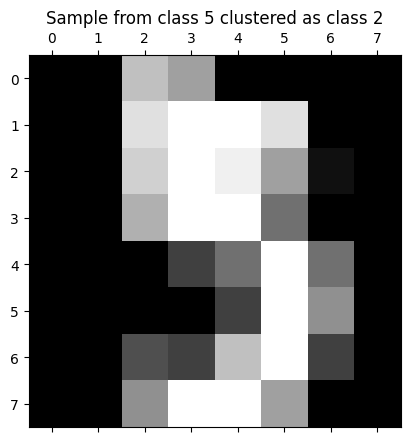

<Figure size 640x480 with 0 Axes>

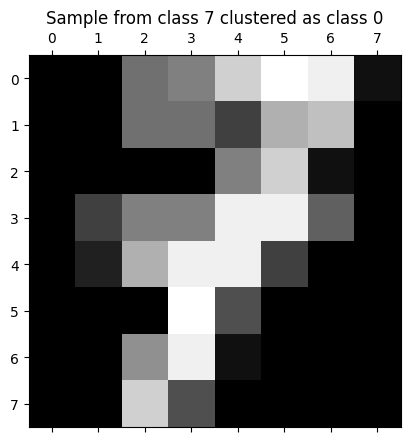

<Figure size 640x480 with 0 Axes>

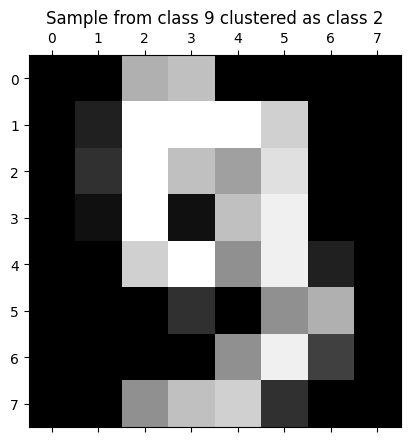

In [83]:
best_v_measure_ward = 0
best_labels_ward = None
n_clusters_list = [2,3,4,5]

print("############ WARD ALGORITHM ############")
for n_clusters in n_clusters_list:
    v_measure, labels = cluster_and_evaluate(lambda: AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward'), X_pca)
    if(v_measure > best_v_measure_ward):
        best_v_measure_ward = v_measure
        best_labels_ward = labels

contingency_mat_ward, incorrect_count_ward, error_percentage_ward, homogeneity_ward, completeness_ward = best_case(y, best_labels_ward, [5, 7, 9])

## T2. Consider the K-means algorithm and the Euclidean distance.

############ K-MEANS ALGORITHM ############

Contingency Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0  42 140   0   0   0]
 [174   0   5   0   0   0]
 [ 10 163   7   0   0   0]]

Incorrectly Clustered Samples: 541
Error Percentage: 100.00%
Homogeneity Score: 0.6753829806363577
Completeness Score: 0.6799495125366182


<Figure size 640x480 with 0 Axes>

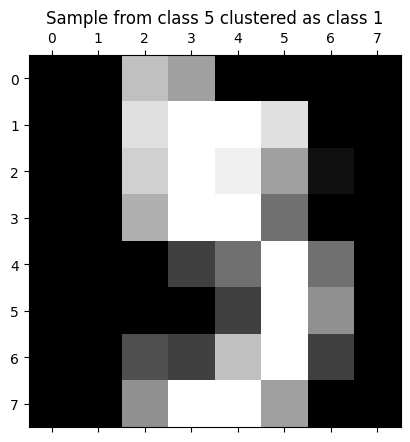

<Figure size 640x480 with 0 Axes>

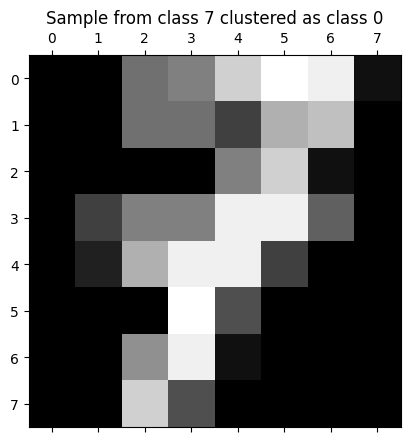

<Figure size 640x480 with 0 Axes>

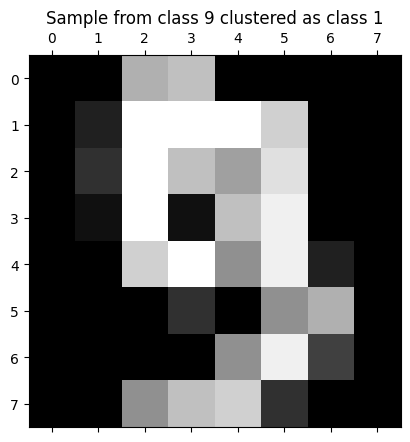

In [84]:
best_v_measure_kmeans = 0
best_labels_kmeans = None

print("############ K-MEANS ALGORITHM ############")
for n_clusters in n_clusters_list:
    v_measure, labels = cluster_and_evaluate(lambda: KMeans(k=n_clusters), X_pca)
    if(v_measure > best_v_measure_kmeans):
        best_v_measure_kmeans = v_measure
        best_labels_kmeans = labels

contingency_mat_kmeans, incorrect_count_kmeans, error_percentage_kmeans, homogeneity_kmeans, completeness_kmeans = best_case(y, best_labels_kmeans, [5, 7, 9])

## T3. Consider the Fuzzy K-means algorithm and the Euclidean distance.

############ FUZZY K-MEANS ALGORITHM ############

Contingency Matrix:
 [[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 70  58   0  54   0   0   0]
 [  5   0 174   0   0   0   0]
 [  8  12   7 153   0   0   0]]

Incorrectly Clustered Samples: 541
Error Percentage: 100.00%
Homogeneity Score: 0.6210931661373696
Completeness Score: 0.5305382271071823


<Figure size 640x480 with 0 Axes>

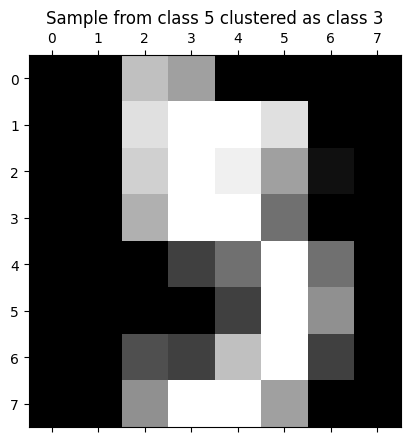

<Figure size 640x480 with 0 Axes>

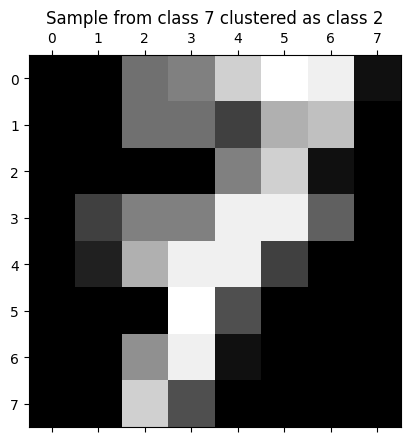

<Figure size 640x480 with 0 Axes>

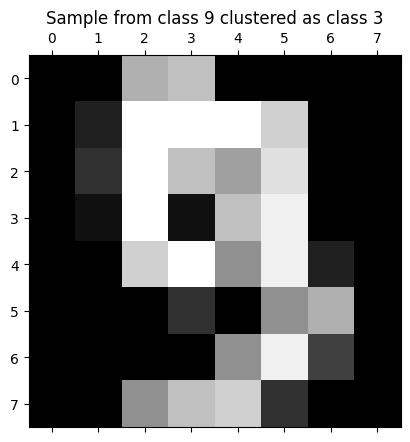

In [85]:
best_v_measure_FuzzyKMeans = 0
best_labels_FuzzyKMeans = None

print("############ FUZZY K-MEANS ALGORITHM ############")
for n_clusters in n_clusters_list:
    v_measure, labels = cluster_and_evaluate(lambda: FuzzyKMeans(n_clusters), X_pca)
    if(v_measure > best_v_measure_FuzzyKMeans):
        best_v_measure_FuzzyKMeans = v_measure
        best_labels_FuzzyKMeans = labels

contingency_mat_FuzzyKMeans, incorrect_count_FuzzyKMeans, error_percentage_FuzzyKMeans, homogeneity_FuzzyKMeans, completeness_FuzzyKMeans = best_case(y, best_labels_FuzzyKMeans, [5, 7, 9])

## T4. Determine the best clustering methodology among the options above

In [86]:
best_clustering = max(
    ("Ward Methodology",best_v_measure_ward),
    ("K-Means Methodology",best_v_measure_kmeans), 
    ("Fuzzy K-Means Methodology", best_v_measure_FuzzyKMeans),
    )
print(f"\nBest clustering methodology is {best_clustering[0]}: {best_clustering[1]}")


Best clustering methodology is Ward Methodology: 0.7621263389730516
